C:\Users\Allyson\AppData\Local\Temp\ipykernel_24324\3342472217.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_proportion.values, y=null_proportion.index, palette='viridis')


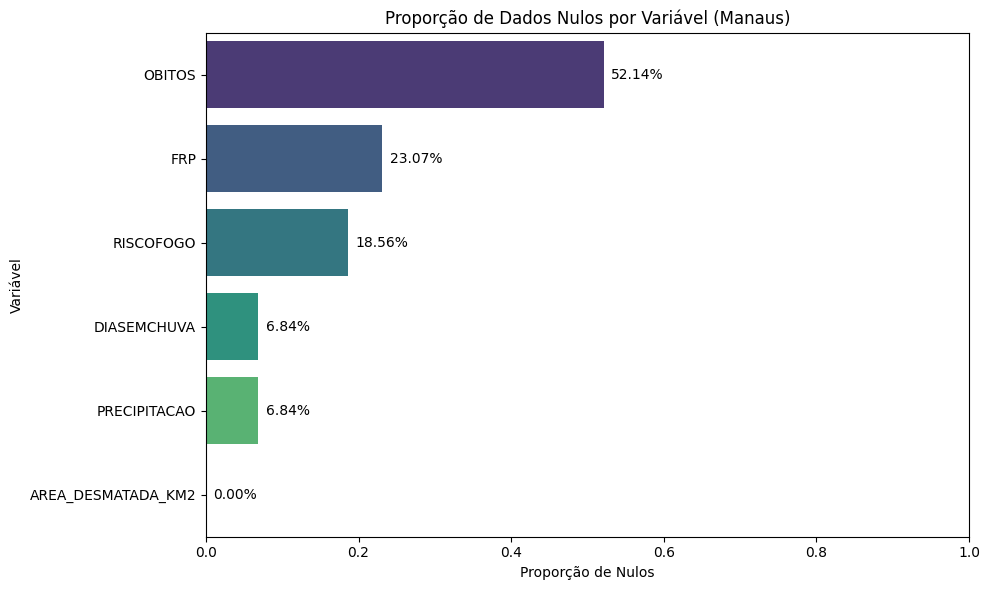

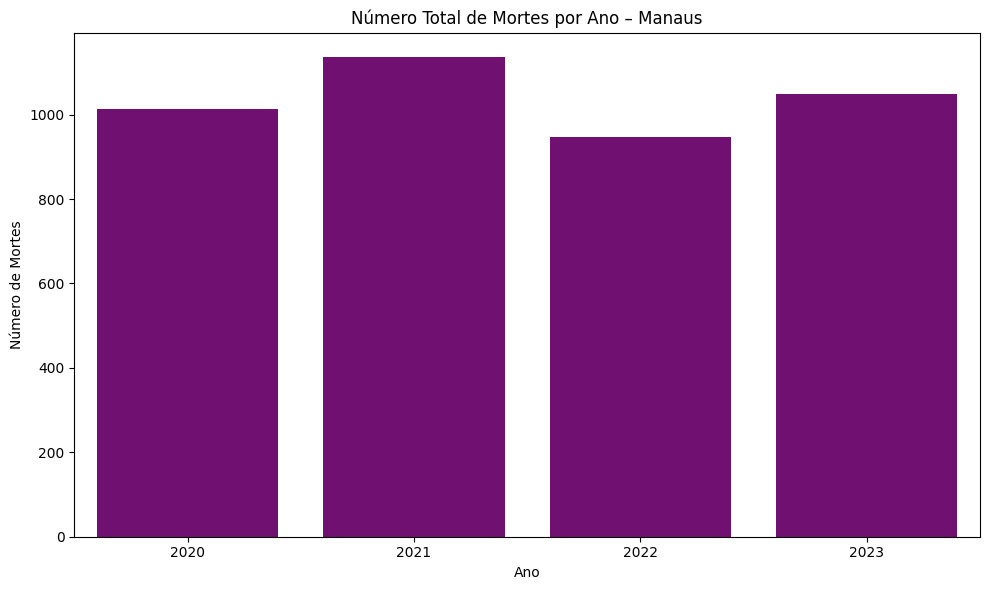

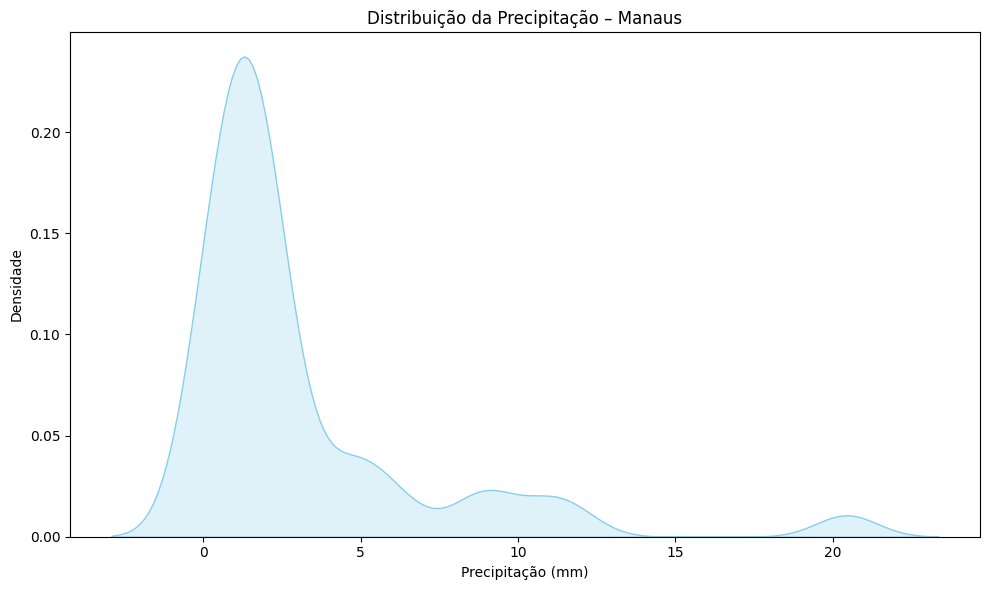

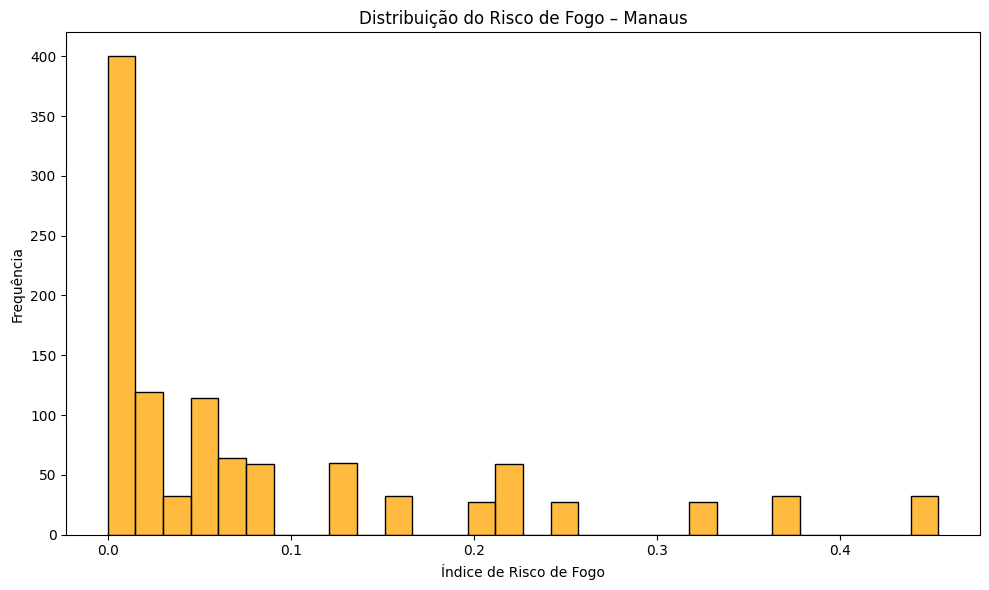

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados com separador correto
df = pd.read_csv('planilha_unificada.csv', sep=';')

# Padronizar nomes de colunas
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_").str.replace("-", "_")

# Variáveis de interesse
cols = ['OBITOS', 'DIASEMCHUVA', 'PRECIPITACAO', 'RISCOFOGO', 'FRP', 'AREA_DESMATADA_KM2']

# Verificar quais colunas existem e converter para numérico
cols_existentes = [col for col in cols if col in df.columns]
for col in cols_existentes:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ---------- Gráfico: Proporção de dados nulos por variável ----------
null_proportion = df[cols_existentes].isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=null_proportion.values, y=null_proportion.index, palette='viridis')

for i, val in enumerate(null_proportion.values):
    plt.text(val + 0.01, i, f"{val:.2%}", va='center')

plt.title('Proporção de Dados Nulos por Variável (Manaus)')
plt.xlabel('Proporção de Nulos')
plt.ylabel('Variável')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# ---------- Figura: Número de mortes anuais ----------
if 'ANO' in df.columns and 'OBITOS' in df.columns:
    mortes_anuais = df.groupby('ANO')['OBITOS'].sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mortes_anuais.index, y=mortes_anuais.values, color='purple')
    plt.title('Número Total de Mortes por Ano – Manaus')
    plt.xlabel('Ano')
    plt.ylabel('Número de Mortes')
    plt.tight_layout()
    plt.show()

# ---------- Distribuição da Precipitação ----------
if 'PRECIPITACAO' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['PRECIPITACAO'].dropna(), fill=True, color='skyblue')
    plt.title('Distribuição da Precipitação – Manaus')
    plt.xlabel('Precipitação (mm)')
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.show()

# ---------- Distribuição do Risco de Fogo ----------
if 'RISCOFOGO' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['RISCOFOGO'].dropna(), bins=30, kde=False, color='orange')
    plt.title('Distribuição do Risco de Fogo – Manaus')
    plt.xlabel('Índice de Risco de Fogo')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


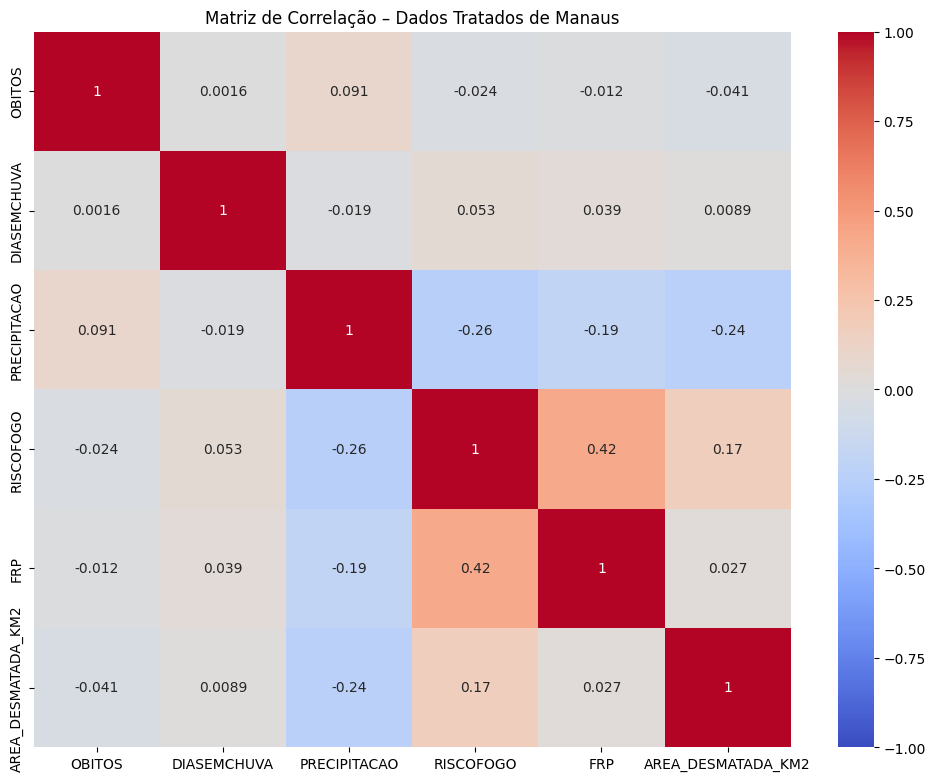

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('planilha_unificada.csv', sep=';')

# Padronizar nomes de colunas
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_").str.replace("-", "_")

# Selecionar variáveis numéricas
cols = ['OBITOS', 'DIASEMCHUVA', 'PRECIPITACAO', 'RISCOFOGO', 'FRP', 'AREA_DESMATADA_KM2']

# Remover duplicadas (se houver)
df = df.drop_duplicates()

# Garantir que colunas sejam numéricas
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Substituir valores nulos pela média global de Manaus (imputação global)
df_filled = df.copy()
for col in cols:
    df_filled[col] = df[col].fillna(df[col].mean())

# ---------- Matriz de correlação geral (Manaus) ----------
corr_matrix = df_filled[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação – Dados Tratados de Manaus')
plt.tight_layout()
plt.show()


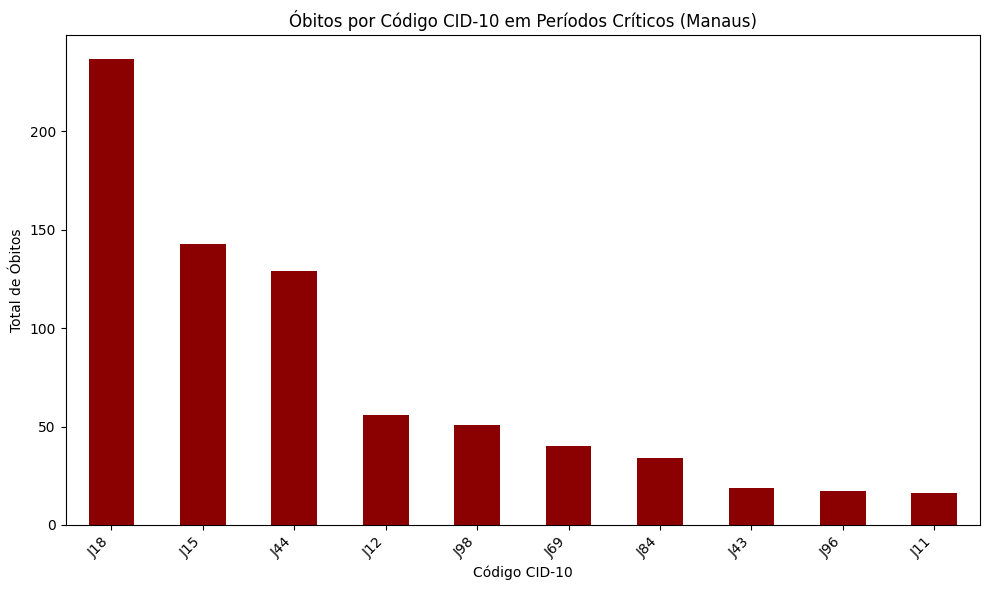

Top 10 códigos CID-10 com mais óbitos em períodos críticos:
CID
J18    237.0
J15    143.0
J44    129.0
J12     56.0
J98     51.0
J69     40.0
J84     34.0
J43     19.0
J96     17.0
J11     16.0
Name: OBITOS, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados com separador correto
df = pd.read_csv('planilha_unificada.csv', sep=';')

# Padronizar nomes de colunas (inclui ponto)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_").str.replace("-", "_").str.replace(".", "_")

# Substituir traços por NaN e converter OBITOS para numérico
df['OBITOS'] = pd.to_numeric(df['OBITOS'].replace('-', pd.NA), errors='coerce')

# Garantir que colunas numéricas estejam no formato correto
numericas = ['OBITOS', 'PRECIPITACAO', 'RISCOFOGO', 'PM2_5_ATM', 'FRP', 'AREA_DESMATADA_KM2']
for col in numericas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular pontuação de severidade: 1 ponto para cada condição crítica atendida
df['SEVERIDADE'] = (
    (df['PRECIPITACAO'] <= 1.0).astype(int) +
    (df['PM2_5_ATM'] >= 22.72).astype(int) +
    (df['FRP'] >= 8.16).astype(int)
)

# Criar nova coluna apenas com o código CID-10 (ex: J18, J15)
df['CID'] = df['CATEGORIA_CID_10'].str.extract(r'(J\d{2})')

# Filtrar registros com severidade ≥ 2
df_critico = df[(df['SEVERIDADE'] >= 2)].dropna(subset=['OBITOS', 'CID'])

# Agrupar por código CID-10 e somar óbitos
obitos_por_cid = df_critico.groupby('CID')['OBITOS'].sum().sort_values(ascending=False)

# Verificar se há dados antes de plotar
if not obitos_por_cid.empty:
    top_categorias = obitos_por_cid.head(10)

    plt.figure(figsize=(10, 6))
    top_categorias.plot(kind='bar', color='darkred')
    plt.title('Óbitos por Código CID-10 em Períodos Críticos (Manaus)')
    plt.xlabel('Código CID-10')
    plt.ylabel('Total de Óbitos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('cid10_obitos_periodo_critico_codigos.png')
    plt.show()

    print("Top 10 códigos CID-10 com mais óbitos em períodos críticos:")
    print(top_categorias)
else:
    print("Nenhum dado encontrado para os critérios de filtragem (SEVERIDADE ≥ 2).")
